In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
data = mnist.load_data()

In [4]:
(X_train,y_train),(X_test,y_test) = data

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
type(X_train)

numpy.ndarray

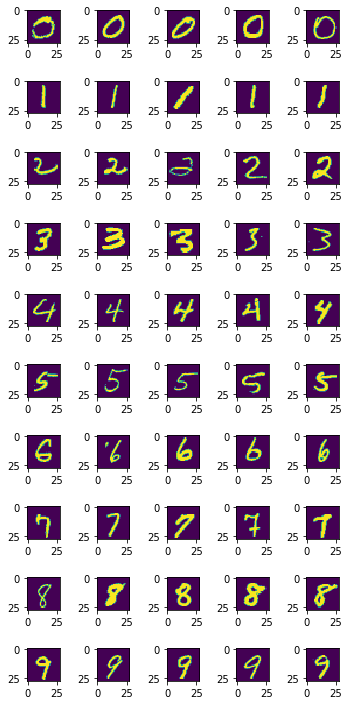

In [8]:
num_of_samples=[]

cols = 5
num_classes = 10

fig,axes = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))

fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_se = X_train[y_train==j]
        axes[j][i].imshow(x_se[random.randint(0,len(x_se)-1),:,:])

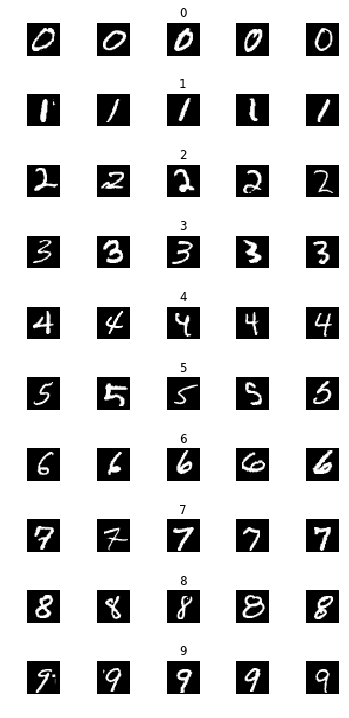

In [9]:
num_of_samples=[]

cols = 5
num_classes = 10

fig,axes = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))

fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_se = X_train[y_train==j]
        axes[j][i].imshow(x_se[random.randint(0,len(x_se)-1),:,:],cmap=plt.get_cmap('gray'))
        axes[j][i].axis('off')
        if i ==2:
            axes[j][i].set_title(str(j))
            num_of_samples.append(len(x_se))

([<matplotlib.axis.XTick at 0x7ff04cfab898>,
 <a list of 10 Text xticklabel objects>)

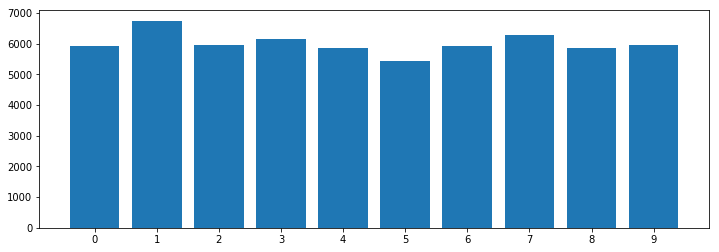

In [10]:
num_of_samples
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.xticks([0,1,2,3,4,5,6,7,8,9])

In [11]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
num_pixel = 784
X_train  =X_train.reshape(X_train.shape[0],num_pixel)
X_test = X_test.reshape(X_test.shape[0],num_pixel)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [14]:
def create_model():
    model = Sequential()
    model.add(Dense(10,input_dim=num_pixel,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(Adam(lr = 0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
    return model

In [15]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=14,batch_size=200,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/14
54000/54000 [==============================] - 1s 22us/step - loss: 0.1379 - acc: 0.9576 - val_loss: 0.1767 - val_acc: 0.9525
Epoch 2/14
54000/54000 [==============================] - 1s 22us/step - loss: 0.1374 - acc: 0.9568 - val_loss: 0.1565 - val_acc: 0.9538
Epoch 3/14
54000/54000 [==============================] - 1s 22us/step - loss: 0.1332 - acc: 0.9583 - val_loss: 0.1692 - val_acc: 0.9515
Epoch 4/14
54000/54000 [==============================] - 1s 23us/step - loss: 0.1351 - acc: 0.9578 - val_loss: 0.1580 - val_acc: 0.9577
Epoch 5/14
54000/54000 [==============================] - 1s 25us/step - loss: 0.1329 - acc: 0.9583 - val_loss: 0.1654 - val_acc: 0.9540
Epoch 6/14
54000/54000 [==============================] - 1s 25us/step - loss: 0.1301 - acc: 0.9591 - val_loss: 0.1695 - val_acc: 0.9525
Epoch 7/14
54000/54000 [==============================] - 1s 23us/step - loss: 0.1324 - acc: 0.9593 - val_loss: 0.1775 - val_acc:

Text(0.5,0,'epoch')

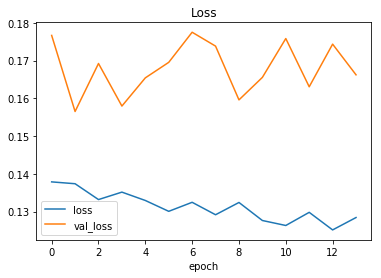

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

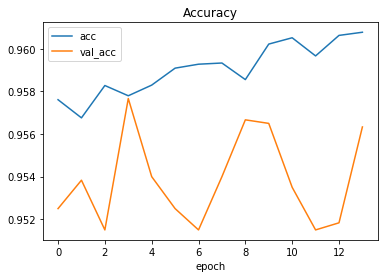

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [34]:
score=model.evaluate(X_test,y_test,verbose=0)

In [35]:
print(score)

[0.20123854414625095, 0.9466]


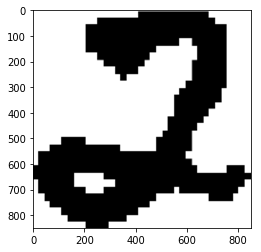

In [37]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

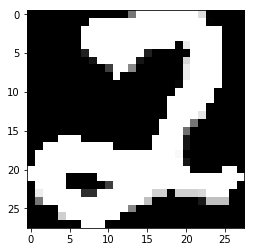

In [38]:
import cv2

img_array  = np.asarray(img)
res = cv2.resize(img_array,(28,28))
gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
image =cv2.bitwise_not(gray)
plt.imshow(image,cmap=plt.get_cmap('gray'))
print(image)

In [39]:
image = image/255
image = image.reshape(1,784)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4627451  1.         1.         1.         1.
  1.         1.         1.         1.         0.87058824 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.00784314 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.         1.         1.
  1.         1.         1.         1.   

In [40]:
model.predict_classes(image)

array([2])